__Chapter 10 - Predicting numeric Target Variables with Regression Analysis__

1. [Import](#Import)
1. [Introducing linear regression](#Introducing-linear-regression)
    1. [Simple linear regression](#Simple-linear-regression)
    1. [Multiple linear regression](#Multiple-linear-regression)
1. [Exploring the housing dataset](#Exploring-the-housing-dataset)
    1. [Visualizing the important characteristics of a dataset](#Visualizing-the-important-characteristics-of-a-dataset)
    1. [Looking at relationships using a correlation matrix](#Looking-at-relationships-using-a-correlation-matrix)
1. [Implementing an ordinary least squares linear regression model](#Implementing-an-ordinary-least-squares-linear-regression-model)
    1. [Solving regression for regression parameters with gradient descent](#Solving-regression-for-regression-parameters-with-gradient-descent)
        1. [Homegrown implementation](#Homegrown-implementation)
    1. [Estimating-coefficient-of-a-regression-model-via-scikit-learn](#Estimating-coefficient-of-a-regression-model-via-scikit-learn)
    1. [Fitting a robust regression model using RANSAC](#Fitting-a-robust-regression-model-using-RANSAC)
1. [Evaluating the performance of linear regression models](#Evaluating-the-performance-of-linear-regression-models)
    1. [Residual plots](#Residual-plots)
    1. [Mean squared error](#Mean-squared-error)
    1. [Coefficient of determination - $R^2$](#Coefficient-of-determination)
1. [Using regularized methods for regression](#Using-regularized-methods-for-regression)
    1. [Ridge regression](#Ridge-regression)
    1. [Lasso regression](#Lasso-regression)
    1. [ElasticNet regression](#ElasticNet-regression)
1. [Turning a linear regression model into a curve – polynomial regression](#Turning-a-linear-regression-model-into-a-curve–polynomial-regression)
    1. [Adding polynomial terms using scikit-learn](#Adding-polynomial-terms-using-scikit-learn)
    1. [Modeling nonlinear relationships in the Housing dataset](#Modeling-nonlinear-relationships-in-the-Housing-dataset)
    1. [Alternative feature transformation](#Alternative-feature-transformation)
1. [Dealing with nonlinear relationships using random forests](#Dealing-with-nonlinear-relationships-using-random-forests)
    1. [Random forest regression](#Random-forest-regression)





# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
from io import StringIO
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.discriminant_analysis as discriminant_analysis
import sklearn.utils as utils

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
from prettierplot.plotter import PrettierPlot
import prettierplot.style as style

# magic functions
%matplotlib inline

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Introducing linear regression

Linear regression is a supervised machine learning technique for predicting target variables that are on a numeric scale.

<a id = 'Introducing-linear-regression'></a>

## Simple linear regression

Simple linear regression involves one input variable, which is used to calculate an output variable. The linear model is defined as:

$$
y = w_0 + w_1x
$$

where $w_0$ is the y-intercept and $w_1$ is the weight coefficient for the input variable $x$. Linear regression find the weights that determine the line of best fit given the input data

<a id = 'Simple-linear-regression'></a>

## Multiple linear regression

Multiple linear regresion involves multiple input variables, which are again used to calculate an output variable. It takes the form:

$$
y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum^m_{i=0}w_ix_i = w^Tx
$$

Where $w_0$ is the y-axis with $x_0$ = 1. This is the bias unit. Multiple linear regression with two input variables forms a plane of best fit, and 3 or more input variable form a hyperplane of best fit.

<a id = 'Multiple-linear-regression'></a>

# Exploring the housing dataset

<a id = 'Exploring-the-housing-dataset'></a>

In [2]:
# load and inspect data
boston = datasets.load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.info()
display(df[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000


In [3]:
# display summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualizing the important characteristics of a dataset

<a id = 'Visualizing-the-important-characteristics-of-a-dataset'></a>

<Figure size 720x360 with 0 Axes>

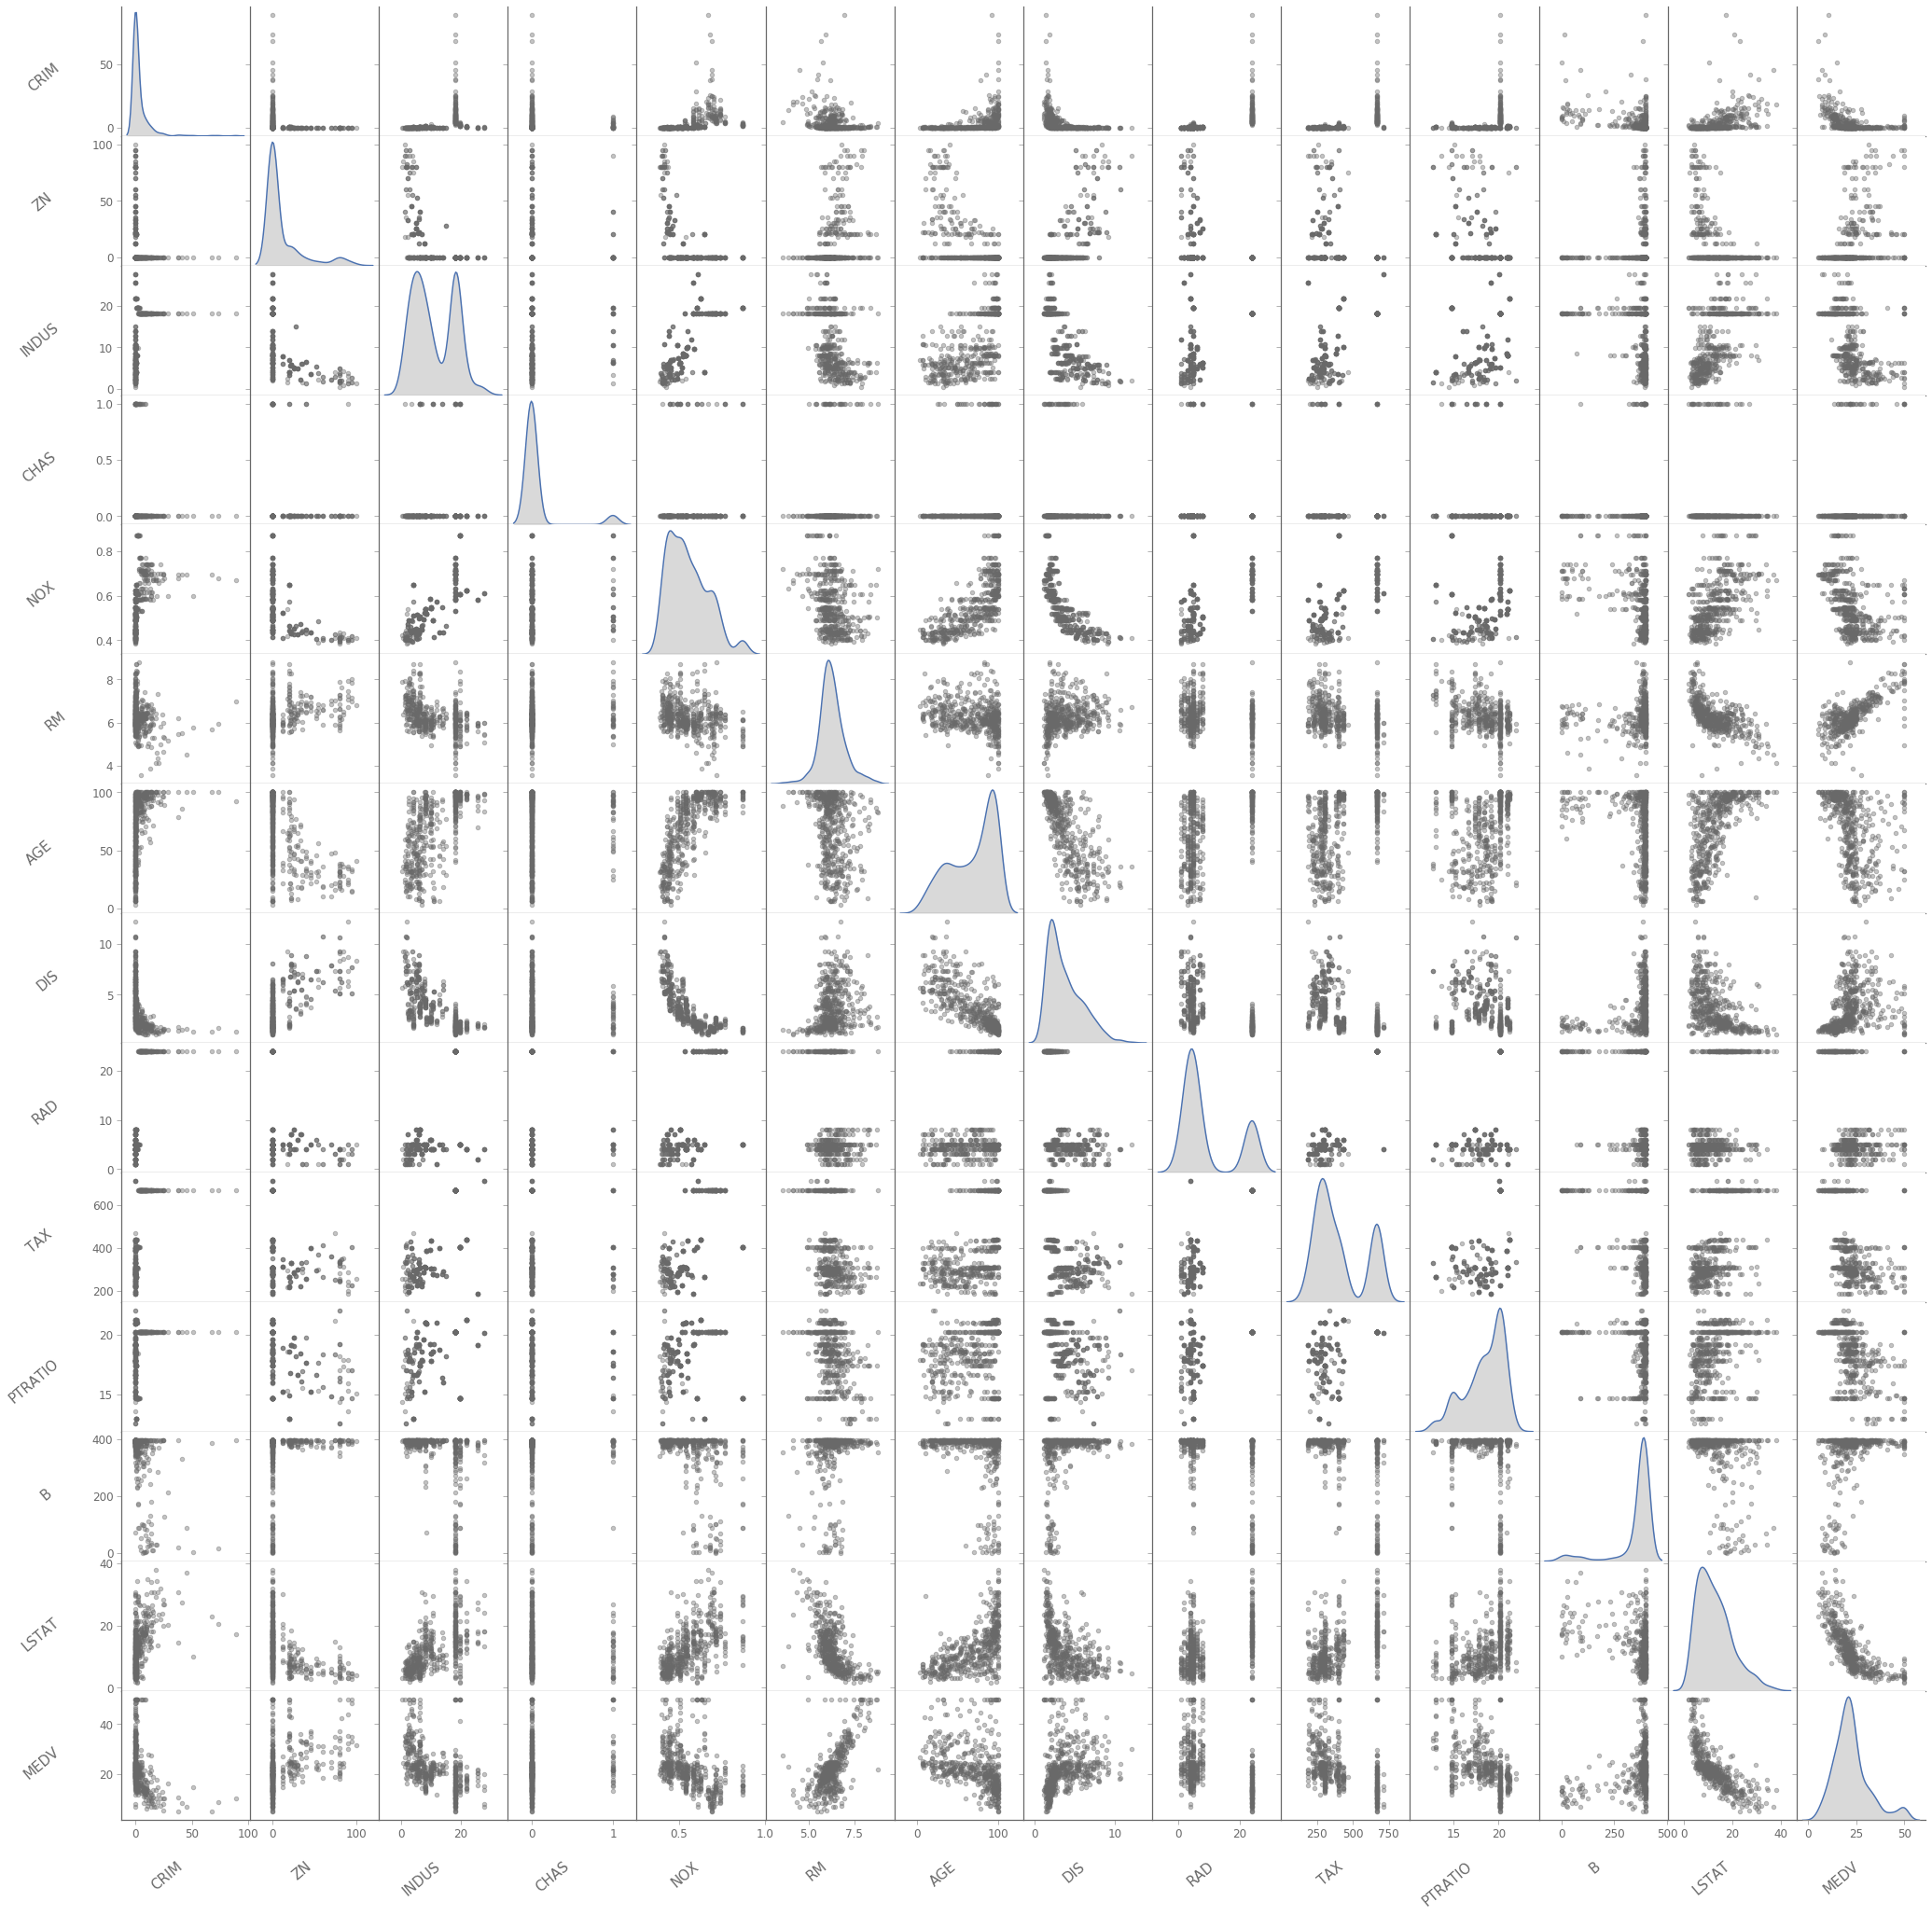

In [4]:
# pair plot
p = PrettierPlot(chartProp=10)
p.prettyPairPlot(df=df, diag_kind="kde")

## Looking at relationships using a correlation matrix

A correlation matrix quantifies and summarizes linear relationships between variables. It is a square matrix that contains the Pearson product-moment correlation coefficient, AKA Pearson's r. This measure describes the linear dependence between pairs of features, and the value ranges of -1 to 1. Pearson's r is the covariance between two features divided by the product of each feature's standard variation:

$$
r = \frac{\sum^n_{i=1}\big[(x^i - \mu_x)(y^i - \mu_y)\big]}{\sqrt{\sum^n_{i=1}(x^i-\mu_x)^2}\sqrt{\sum^n_{i=1}(y^i-\mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
$$

<a id = 'Looking-at-relationships-using-a-correlation-matrix'></a>

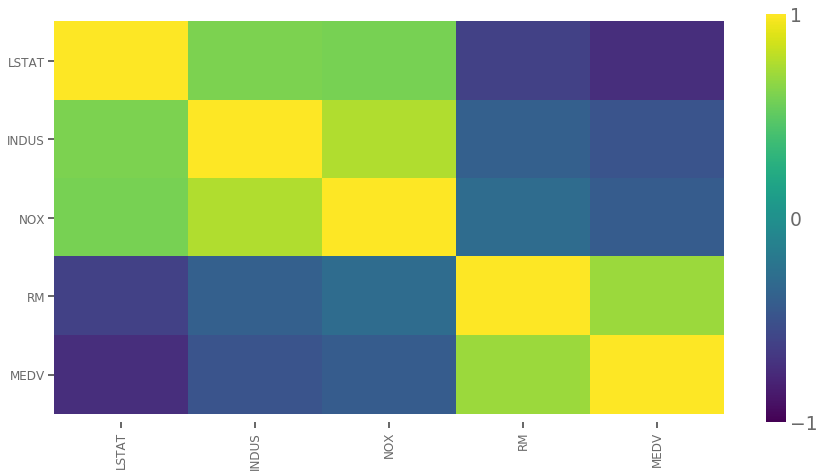

In [5]:
# correlation heat map
p = PrettierPlot()
ax = p.makeCanvas()
p.prettyCorrHeatmap(df=df, cols=["LSTAT", "INDUS", "NOX", "RM", "MEDV"], ax=ax)

> Remarks - The linear regression model thrives on features that have high correlation with the target variable. Based on the correlation heatmap above, It's clear that the target variable MEDV has it highest correlation with LSTAT (-0.74), followed closely by RM (0.70)

# Implementing an ordinary least squares linear regression model

Finding a line of best fit using linear regression can be accomplished with Ordinary Least Squares (OLS), which seeks to estimate the parameters of the linear regression lines that mnimize the sum of the squared distance of the prediction to the sample points. This error is also referred to as the residual.

<a id = 'Implementing-an-ordinary-least-squares-linear-regression-model'></a>

## Solving regression for regression parameters with gradient descent

The cost function used in chapter 2 for the Adaline function, which was optimized using gradient descent, is identical to the function used for OLS:

$$
J(w) = \frac{1}{2}\sum^n_{i=2}\big(y^i - \hat{y}^i\big)^2
$$

$\hat{y}$ is the predicted value, $\hat{y} = w^Tx$.

<a id = 'Solving-regression-for-regression-parameters-with-gradient-descent'></a>

### Homegrown implementation

<a id = 'Homegrown-implementation'></a>

In [6]:
# custom linear regression gradient descent
class LinearRegressionGD:
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
# separate feature and label
X = df[["RM"]].values
y = df["MEDV"].values

# scale data
sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# fit model
linReg = LinearRegressionGD()
linReg.fit(X_std, y_std)

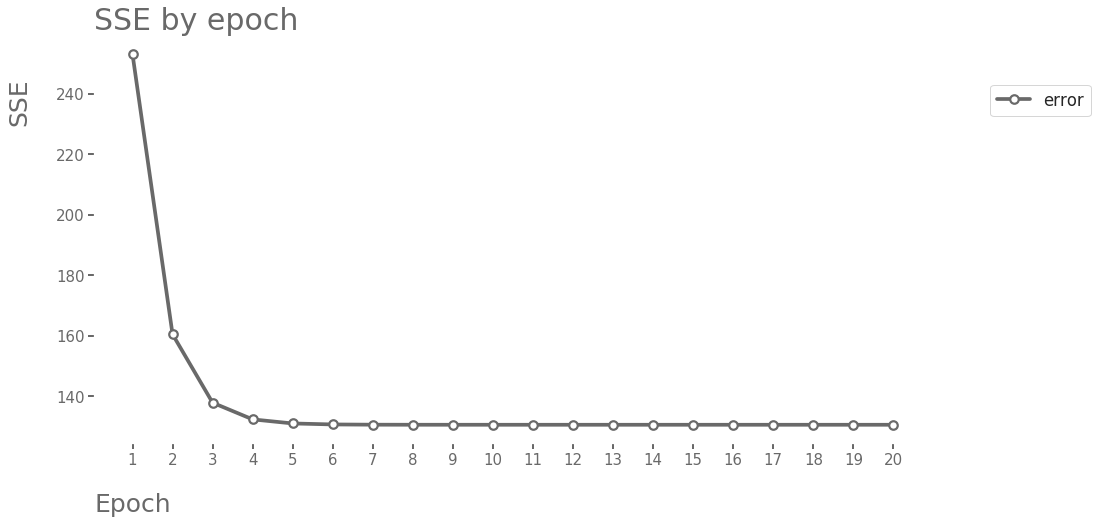

In [8]:
# display SSE by epoch
p = PrettierPlot()
ax = p.makeCanvas(title="SSE by epoch", xLabel="Epoch", yLabel="SSE", yShift=0.78)
p.prettyLine(
    x=np.arange(1, linReg.n_iter + 1),
    y=np.array(linReg.cost_),
    label="error",
    xUnits="f",
    xTicks=np.arange(1, 21, 1),
    yUnits="f",
    markerOn=True,
    ax=ax,
)

> Remarks - LinearRegressionGD converged after the the 5th epoch

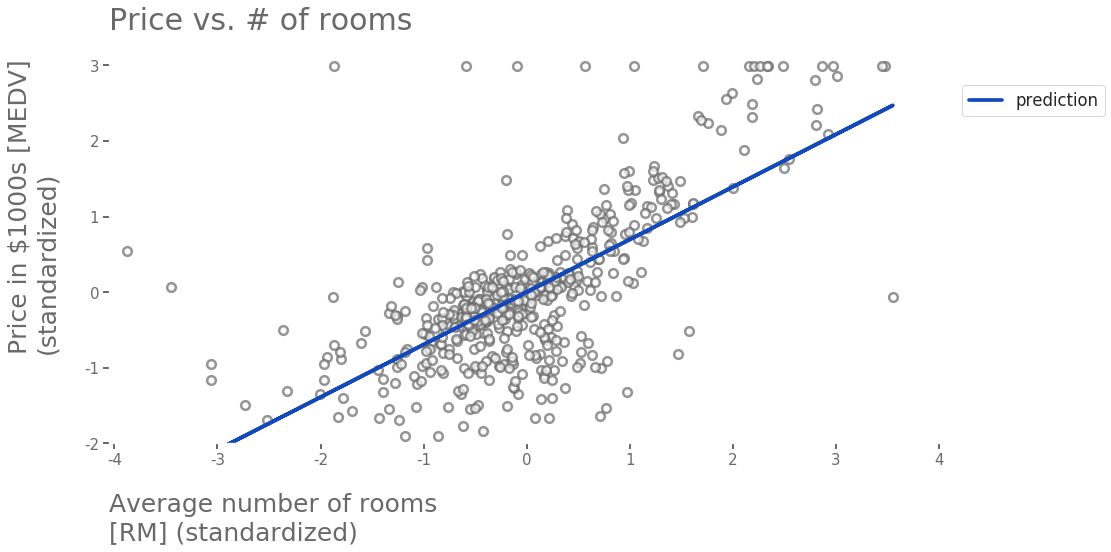

In [10]:
# visualize relationship between predictor and response with line of best fit
p = PrettierPlot()
ax = p.makeCanvas(
    title="Price vs. # of rooms",
    xLabel="Average number of rooms \n[RM] (standardized)",
    yLabel="Price in $1000s [MEDV] \n(standardized)",
    yShift=0.22,
)
p.pretty2dScatter(x=X_std, y=y_std, ax=ax)
p.prettyLine(
    x=X_std,
    y=linReg.predict(X_std),
    label="prediction",
    linecolor=style.styleBlue,
    markerOn=False,
    ax=ax,
)

> Remarks - In general, as the number of rooms increases, so does the house value. Also, There are several dots along y = 3, which suggests that the data was capped at a certain value.

## Estimating coefficient of a regression model via scikit-learn

The scikit-learn implementation of linear regression makes use of many optimizations which make it much more efficient than the homegrown implementation above. It may also perform well with unstandardized variables, which is desirable in certain applications, such as when interpretability is of high importance.

<a id = 'Estimating-coefficient-of-a-regression-model-via-scikit-learn'></a>

In [11]:
# run sklearn linear regression on unstandardized variables
linReg = linear_model.LinearRegression()
linReg.fit(X, y)
print("Slope: {0}".format(linReg.coef_[0]))
print("Intercept: {0}".format(linReg.intercept_))

Slope: 9.10210898118031
Intercept: -34.67062077643857


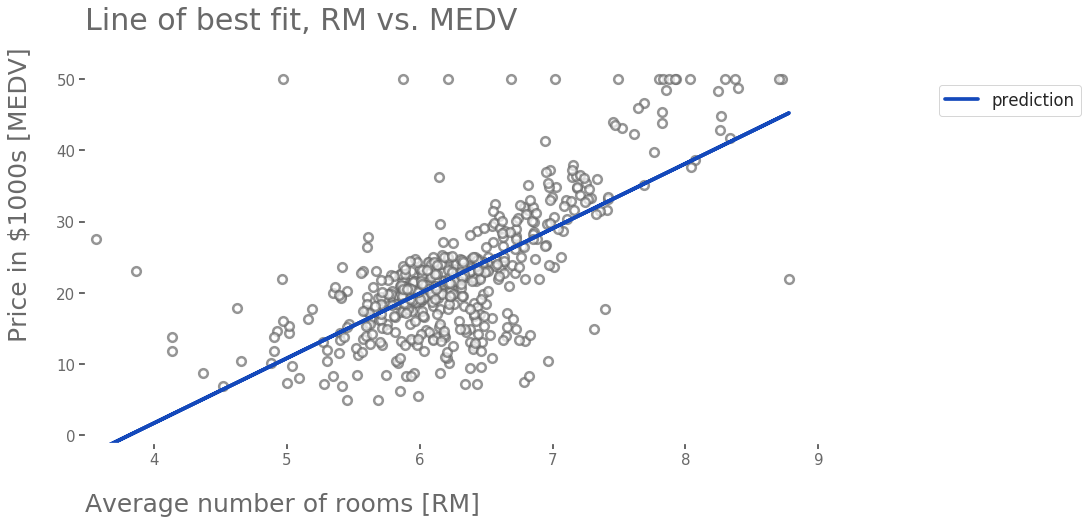

In [16]:
# visualize relationship between predictor and response with line of best fit
p = PrettierPlot()
ax = p.makeCanvas(
    title="Line of best fit, RM vs. MEDV",
    xLabel="Average number of rooms [RM]",
    yLabel="Price in $1000s [MEDV]",
    yShift=0.25,
)
p.pretty2dScatter(x=X, y=y, ax=ax)
p.prettyLine(
    x=X,
    y=linReg.predict(X),
    label="prediction",
    linecolor=style.styleBlue,
    markerOn=False,
    ax=ax,
)

> Remarks - The results are identical to the homegrown implementation even with unstandardized variables.

## Fitting a robust regression model using RANSAC

Outliers can have a very strong effect on the estimated model coefficients. One strategy is to selectively remove outliers. An alternative is using the Random Sample Consensus, or RANSAC, algorithm. This approach fits a regression model to a specific subset of the data, which can be thought of as the "inliers". The algorithm follows this general approach:

1. Select a random number of samples to be inliers, fit the model.
2. Test all other samples against the model fitted on the sampled inliers, and from the other samples add the points that fall within a user-provided tolerance to the inliers.
3. Refit the model against using the original inliers and the additional samples.
4. Estimate the error of the fitted model compared to the inliers.
5. Terminate algorithm if performance meets a define threshold or a set number of iterations has been completed, otherwise repeat process.

<a id = 'Fitting-a-robust-regression-model-using-RANSAC'></a>

In [17]:
# fit RANSAC regression model
ransac = linear_model.RANSACRegressor(
    linear_model.LinearRegression(),
    max_trials=100,
    min_samples=50,
    loss="absolute_loss",
    residual_threshold=5.0,
    random_state=0,
)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

> Remarks - The above RANSAC model will run for a maximum of 100 iterations. A minimum of 50 "inliers" need to be chosen at random for the initial model. Absolute loss is chosen as the residual metric parameter, which will calculate the absolute distances between the fitted line and the sample data points. The residual threshold of 5.0 means that only samples that are within 5.0 distance units of the fitted line can be considered as inliers. All of these selections are problem-specific.

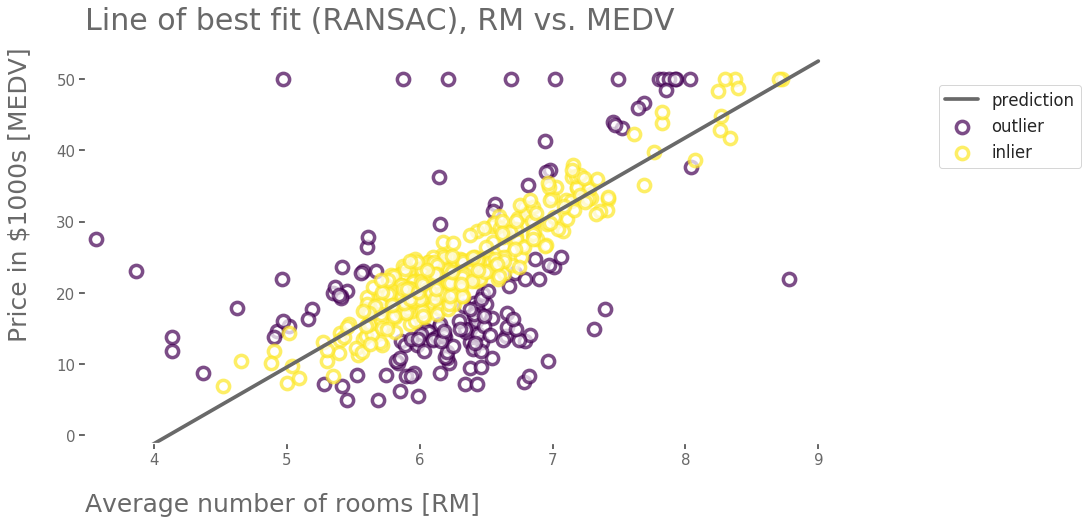

In [19]:
# identify which points were used by the RANSAC model
inlier_mask = ransac.inlier_mask_
inlier_label = [1 if x else 0 for x in inlier_mask]
X_line = np.arange(3, 10, 1)
y_line = ransac.predict(X_line[:, np.newaxis])

# visual relationship between response and predictor with line of best fit
p = PrettierPlot()
ax = p.makeCanvas(
    title="Line of best fit (RANSAC), RM vs. MEDV",
    xLabel="Average number of rooms [RM]",
    yLabel="Price in $1000s [MEDV]",
    yShift=0.25,
)
p.pretty2dScatterHue(
    x=X,
    y=y,
    target=np.array(inlier_label),
    label=["outlier", "inlier"],
    xUnits="f",
    yUnits="f",
    bbox=(1.2, 0.9),
    ax=ax,
)
p.prettyLine(
    x=X_line,
    y=y_line,
    label="prediction",
    linecolor=style.styleGrey,
    markerOn=False,
    ax=ax,
)

In [20]:
# display slope and intercept
print("Slope: {0}".format(ransac.estimator_.coef_[0]))
print("Intercept: {0}".format(ransac.estimator_.intercept_))

Slope: 10.734508808479278
Intercept: -44.08906428639813


> Remarks - The intercept and coefficient are different when compared to the linear regression model learned in the example above. While we diminished the effect of outliers on the model coefficients, tt is not clear which  model is best. the following section will review different approaches for evaluating a regression model.

# Evaluating the performance of linear regression models

<a id = 'Evaluating-the-performance-of-linear-regression-models'></a>

## Residual plots

<a id = 'Residual-plots'></a>

In [21]:
# train/test split
X = df.iloc[:, :-1].values
y = df["MEDV"].values.reshape(-1, 1)

XTrain, XTest, yTrain, yTest = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [22]:
# create model with full set of predictor variables
linReg = linear_model.LinearRegression()
linReg.fit(XTrain, yTrain)
yPredsTrain = linReg.predict(XTrain)
yPredsTest = linReg.predict(XTest)

In [23]:
# repeat value 1 X times (len of train then test array)
yActual = np.vstack((yTrain, yTest))
yPreds = np.vstack((yPredsTrain, yPredsTest))
yType = np.hstack((np.repeat(0, yTrain.shape[0]), np.repeat(1, yTest.shape[0])))

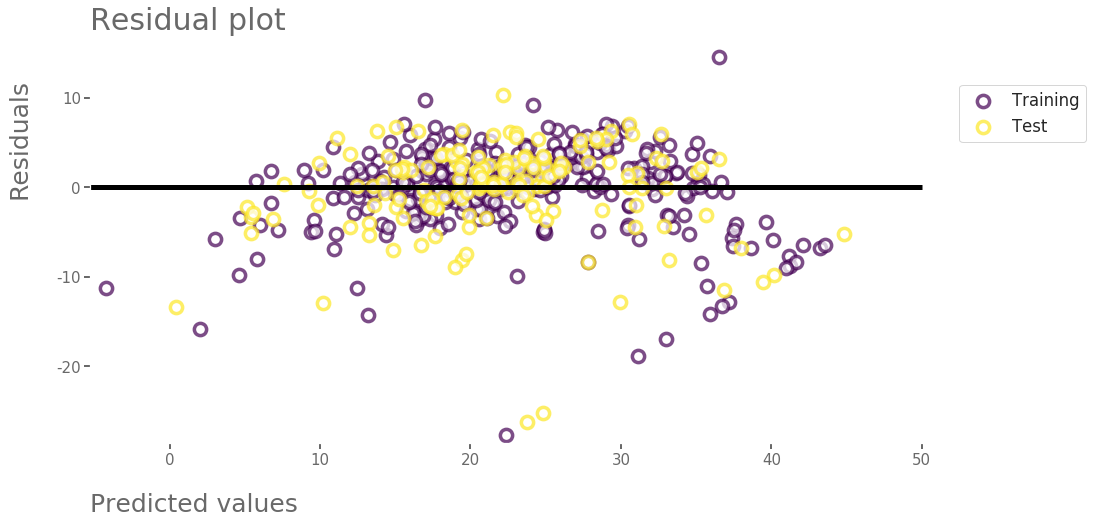

In [24]:
# visualize predictions using residual plot
p = PrettierPlot()
ax = p.makeCanvas(
    title="Residual plot", xLabel="Predicted values", yLabel="Residuals", yShift=0.6
)
p.pretty2dScatterHue(
    x=yPreds,
    y=yPreds - yActual,
    target=yType,
    label=["Training", "Test"],
    xUnits="f",
    yUnits="f",
    bbox=(1.2, 0.9),
    ax=ax,
)
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=5)

> Remarks - A perfect model would have all residuals along the black line, but this will never happen in a realistic example. What we can evaluate, though, is how the errors are distributed around the center line. Patterns in the scatter indicate that the model is unable to capture some explanatory information. This information has leaked into the residuals, and this leakage is somewhat apparent in the above visual.

## Mean squared error

Mean squared error (MSE) is a quantitative measure of a model's performance. This is simply the average value of the sum of squared errors (SSE) that we minimized while fitting the linear regression model. It is a useful measure for comparing different regression models or for tuning parameters with GridSearchCV. It normalizes the SSE by the sample size:

$$
MSE = \frac{1}{n}\sum^n_{i=1}\big(y^i - \hat{y}^i\big)^2
$$

In [25]:
# print training and test MSE
print("Training data MSE: {}".format(metrics.mean_squared_error(yTrain, yPredsTrain)))
print("Test data MSE: {}".format(metrics.mean_squared_error(yTest, yPredsTest)))

Training data MSE: 19.958219814238042
Test data MSE: 27.195965766883408


<a id = 'Mean-squared-error'></a>

## Coefficient of determination - $R^2$

The coefficient of determination, often referred to as the $R^2$ (R-squared). Is a standardized version of the MSE. It is the fraction of response variance captured by the model:

$$
R^2 = 1 - \frac{SSE}{SST}
$$

$SST$ is the total sum of squares, or simply the variance of the response $SST = \sum^n_{i=1}\big(y^i - \mu_y\big)^2$

The full equation is:

$$
1-\frac{\frac{1}{n}\sum^n_{i=1}\big(y^i - \hat{y}^i\big)^2}{\frac{1}{n}\sum^n_{i=1}\big(y^i - \mu_y\big)^2}
$$

Or:

$$
1 - \frac{MSE}{Var(y)}
$$

For the training data, $R^2$ will be between 0 and 1, and can become negative for the test set. An $R^2$ of 1 means the model fits the data perfectly, and $MSE$ will be 0.

<a id = 'Coefficient of determination'></a>

In [26]:
# print training and test R-sqiared
print("Training data R^2: {}".format(metrics.r2_score(yTrain, yPredsTrain)))
print("Test data R^2: {}".format(metrics.r2_score(yTest, yPredsTest)))

Training data R^2: 0.7645451026942549
Test data R^2: 0.6733825506400171


# Using regularized methods for regression

Regularization is a technique for combating overfitting, which is accomplished by adding a penalty term to the cost function. This strategy adds additional information to the model that penalizing complex models, which results in shrinking of the parameter values. The three most common approach are Ridge Regression, Lasso Regression and ElasticNet Regression.

<a id = 'Using-regularized-methods-for-regression'></a>

## Ridge regression

Ridge regression is an L2 penalized model. We add the squared sum of the weight to the least squared cost function:

$$
J(w)_{Ridge} = \sum^n_{i=1}\big(y^i - \hat{y}^i\big)^2 + \lambda\Vert{w}\Vert_2^2
$$
$$
L2: \lambda\Vert{w}\Vert_2^2 = \lambda\sum^m_{j=1}w_j^2
$$
The hyperparameter $\lambda$ is used to control the regularization strength. Higher values applies a higher penalty and shrinks the weights more.

<a id = 'Ridge-regression'></a>

## Lasso regression

Lasso regression's penalty is the sum of the absolute weights, and this differs from Ridge regression in that it can shrink weights to zero, effectively performing feature selection.

$$
J(w)_{LASSO} = \sum^n_{i=1}\big(y^i - \hat{y}^i\big)^2 + \lambda\Vert{w}\Vert_1
$$
$$
L1: \lambda\Vert{w}\Vert_1 = \lambda\sum^m_{j=1}\vert{w_j}\vert
$$


<a id = 'Lasso-regression'></a>

## ElasticNet-regression

ElasticNet regression uses both L1 and L2 penalties. The L1 penalty generates sparsity by eliminating features and the L2 penalty overcomes some of the limitations of Lasso regression.

$$
J(w)_{ElasticNet} = \sum^n_{i=1}\big(y^i - \hat{y}^i\big)^2 + \lambda_1\Vert{w}\Vert_2^2 + \lambda_2\Vert{w}\Vert_1
$$

<a id = 'ElasticNet-regression'></a>

# Turning a linear regression model into a curve – polynomial regression

Linear regressions assumes a linear relationship between the dependent and independent variables. Polynomial features allow us to use linear regression to model non-linear relationships:

$$
y = w_0+w_1x+w_2x^2+...+w_dx^d
$$

where $d$ denotes the degree of the polynomial.

<a id = 'Turning-a-linear-regression-model-into-a-curve–polynomial-regression'></a>

## Adding polynomial terms using scikit-learn

<a id = 'Adding-polynomial-terms-using-scikit-learn'></a>

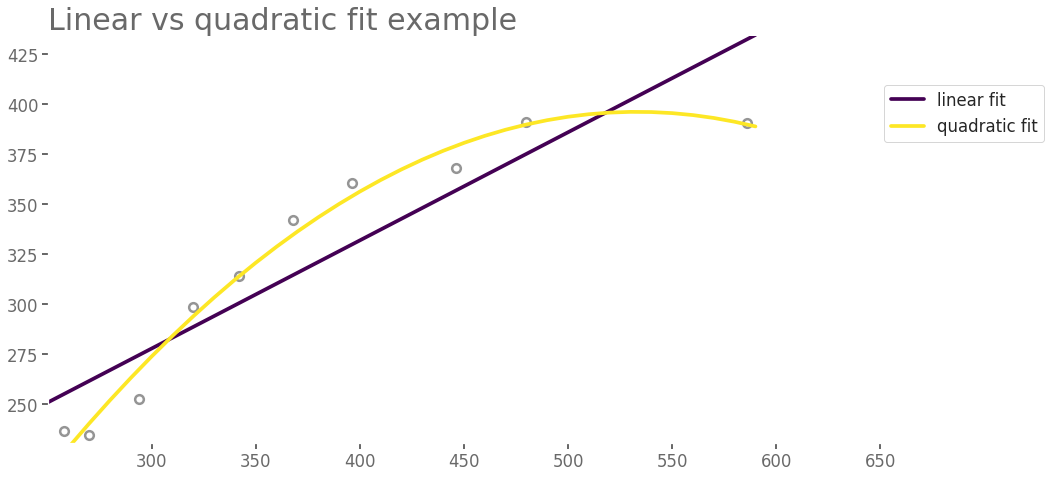

In [27]:
# add a polynomial term
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[
    :, np.newaxis
]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

quadratic = preprocessing.PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# create a simple linear regression model
linReg = linear_model.LinearRegression()
linReg.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_fit = linReg.predict(X_fit)

# create linear regression model using quadratic X

polyReg = linear_model.LinearRegression()
polyReg.fit(X_quad, y)
y_quad_fit = polyReg.predict(quadratic.fit_transform(X_fit))

# plot lines of best fit
p = PrettierPlot()
ax = p.makeCanvas(
    title="Linear vs quadratic fit example",
    xLabel="",
    yLabel="",
    yShift=0.8,
    xShift=0.1,
)
p.pretty2dScatter(x=X, y=y, xUnits="f", yUnits="f", ax=ax)
p.prettyMultiLine(
    x=X_fit,
    y=np.c_[y_fit, y_quad_fit],
    label=["linear fit", "quadratic fit"],
    xUnits="f",
    yUnits="f",
    bbox=(1.2, 0.9),
    markerOn=False,
    ax=ax,
)

In [28]:
# generate predictions and display MSE / R-squared
yPredsLin = linReg.predict(X)
print("Linear model R^2: {}".format(metrics.r2_score(y, yPredsLin)))
print("Linear model MSE: {}".format(metrics.mean_squared_error(y, yPredsLin)))

yPredsQuad = polyReg.predict(X_quad)
print("Quadratic model R^2: {}".format(metrics.r2_score(y, yPredsQuad)))
print("Quadratic model MSE: {}".format(metrics.mean_squared_error(y, yPredsQuad)))

Linear model R^2: 0.8317053837891232
Linear model MSE: 569.7796663183207
Quadratic model R^2: 0.9818850241163606
Quadratic model MSE: 61.33021451744721


> Remarks - The quadratic model appears to fit the samples better, and the MSE/$R^2$ scores confirm.

## Modeling nonlinear relationships in the Housing dataset

<a id = 'Modeling-nonlinear-relationships-in-the-Housing-dataset'></a>

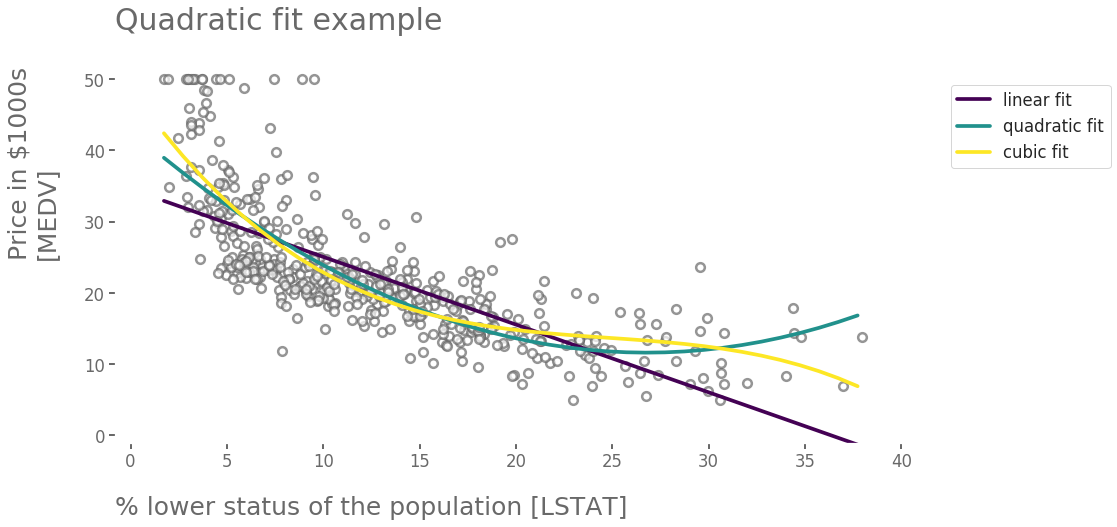

In [29]:
# set response and predictor variables
X = df[["LSTAT"]].values
y = df["MEDV"].values

reg = linear_model.LinearRegression()

# create polynomial (quadratic, cubic) features
poly2 = preprocessing.PolynomialFeatures(degree=2)
X_quad = poly2.fit_transform(X)
poly3 = preprocessing.PolynomialFeatures(degree=3)
X_cubic = poly3.fit_transform(X)

# fit linear model
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
reg.fit(X, y)
y_fit_lin = reg.predict(X_fit)
r2_lin = metrics.r2_score(y, reg.predict(X))

# fit quadratic model
reg.fit(X_quad, y)
y_fit_quad = reg.predict(poly2.fit_transform(X_fit))
r2_quad = metrics.r2_score(y, reg.predict(X_quad))

# fit cubic model
reg.fit(X_cubic, y)
y_fit_cubic = reg.predict(poly3.fit_transform(X_fit))
r2_cubic = metrics.r2_score(y, reg.predict(X_cubic))

# plot lines of best fit
p = PrettierPlot()
ax = p.makeCanvas(
    title="Quadratic fit example",
    xLabel="% lower status of the population [LSTAT]",
    yLabel="Price in $1000s \n[MEDV]",
    yShift=0.45,
)
p.pretty2dScatter(x=X, y=y, ax=ax)
p.prettyMultiLine(
    x=X_fit,
    y=np.c_[y_fit_lin, y_fit_quad, y_fit_cubic],
    label=["linear fit", "quadratic fit", "cubic fit"],
    bbox=(1.2, 0.9),
    markerOn=False,
    ax=ax,
)

In [30]:
# print R-squared of each model
print("Linear R^2: {0}".format(r2_lin))
print("Quadratic R^2: {0}".format(r2_quad))
print("Cubic R^2: {0}".format(r2_cubic))

Linear R^2: 0.5441462975864797
Quadratic R^2: 0.6407168971636612
Cubic R^2: 0.6578476405895719


> Remarks - The quadratic and cubic models perform much better than the linear model. The cubic model is a meaningful improvement on the quadratic model. We should use caution with adding polynomial features and increasing the degree, as this adds complexity and may lead to overfitting.

## Alternative feature transformation

The cubic fit captures the relationship between LSTAT and MEDV best, but there are other ways to approach non-linear relationships between variables. By observing the relationships between these two variables, we might conclude that a log-transformation of LSTAT and the square root of the MEDV may project the data onto a linear feature space that would be agreeable with a linear regression model. The author points out that the relationship between these two variables appears similar to the exponential function:

$$
f(x) = 2^{-x}
$$

Because the natural log of an exponential function is a straight line, the following transformation may help make in projecting the data into a linear relationship:

$$
\mbox{log}(f(0)) = -x
$$

<a id = 'Alternative-feature-transformation'></a>

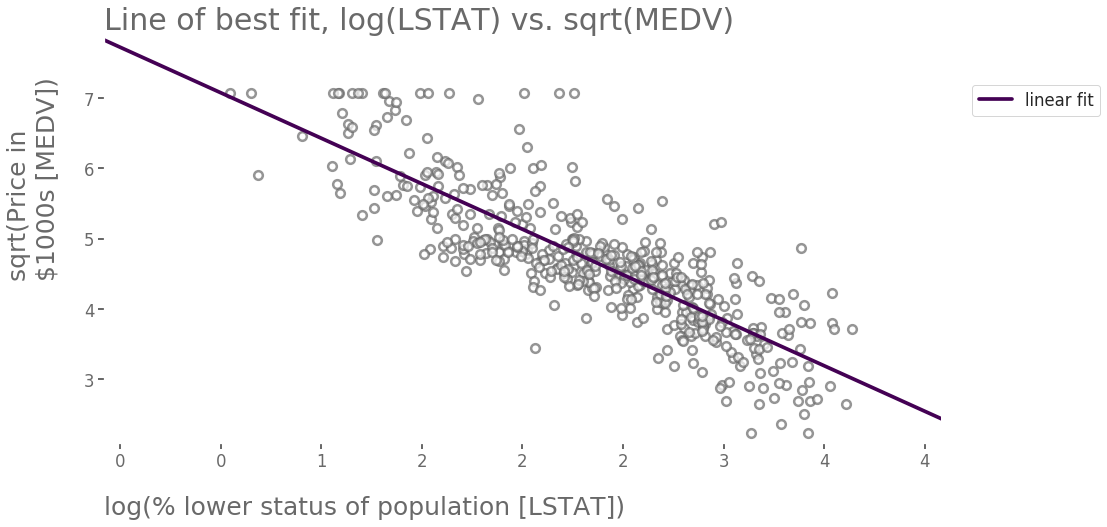

In [31]:
# test the hypothesis above
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
reg = reg.fit(X_log, y_sqrt)
y_fit = reg.predict(X_fit)

# plot log adjusted response vs sqrt of price
p = PrettierPlot()
ax = p.makeCanvas(
    title="Line of best fit, log(LSTAT) vs. sqrt(MEDV)",
    xLabel="log(% lower status of population [LSTAT])",
    yLabel="sqrt(Price in \n$1000s [MEDV])",
    yShift=0.4,
)
p.pretty2dScatter(x=X_log, y=y_sqrt, ax=ax)
p.prettyMultiLine(
    x=X_fit, y=y_fit, label=["linear fit"], bbox=(1.2, 0.9), markerOn=False, ax=ax
)

In [32]:
# generate predictions and print R-squared
yPreds = reg.predict(X_log)
print("Transformed linear R^2: {0}".format(metrics.r2_score(y_sqrt, yPreds)))

Transformed linear R^2: 0.6909284798971007


> Remarks - The log transformation of the explanatory variable and the square root of the dependent variable reults in a feature space that is conducive to linear regression without polynomial features. In fact, the $R^2$ is the best of all models trained so far.

# Dealing with nonlinear relationships using random forests

A random forest is an ensemble of multiple decision trees and can be thought of as the sum of piecewise linear functions, as opposed to the global linear and polynomial regression models explored above. Said differently, decision trees subdivide the input feature space into small, more manageable regions.

Decision trees do not require and feature transformation, even if we are using nonlinear data. Decision trees are grown by iteratively splitting nodes until all leaves are pure, or some other stopping criteria is met. We use entropy to measure the level of impurity of a potential split, which we then use to determine which feature split achieves the maximum information gain at a given level in the tree. A binary split takes the form:

$$
IG(D_P,X_i) = I(D_P) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})
$$

Where $x$ is the feature to perform the split on, $N_P$ is the number of samples in the parent nodes, $I$ is the impurity function, $D_p$ is the subset of training samples at the parent node, and $D_{left}$ and $D_{right}$ are the subset of samples at the left and right child node. The information gain is maximimized when the left and right node segments of the equation above are minimized. This results in child nodes with the least amount of impurity.

When using decision trees for classification, common impurity measure are gini and entropy. For regression, we need to use an impurity metric that is suitable for numeric variables. Instead we define the impurity measure of a node $t$ as the MSE:

$$
I(t) = MSE(t) = \frac{1}{N}\sum_{i \in D_t}\big(y^i - \hat{y}_t\big)^2
$$

$N_t$ is the number of training samples at node $t$, $D_t$ is the training data subset at node $t$, $y^i$ is the true target value, and $\hat{y}_t$ is the predicted target value, which is equal to the sample mean in that node:

$$
\hat{y}_t = \frac{1}{N}\sum_{i \in D_t}y^i
$$

In the context of decision tree regression, this MSE is sometimes referred to as 'within-node variance', which is why the splitting criterion is best known as 'variance reduction'. We can visualize the line of best fit determined by the decision tree regression.

<a id = 'Dealing-with-nonlinear-relationships-using-random-forests'></a>

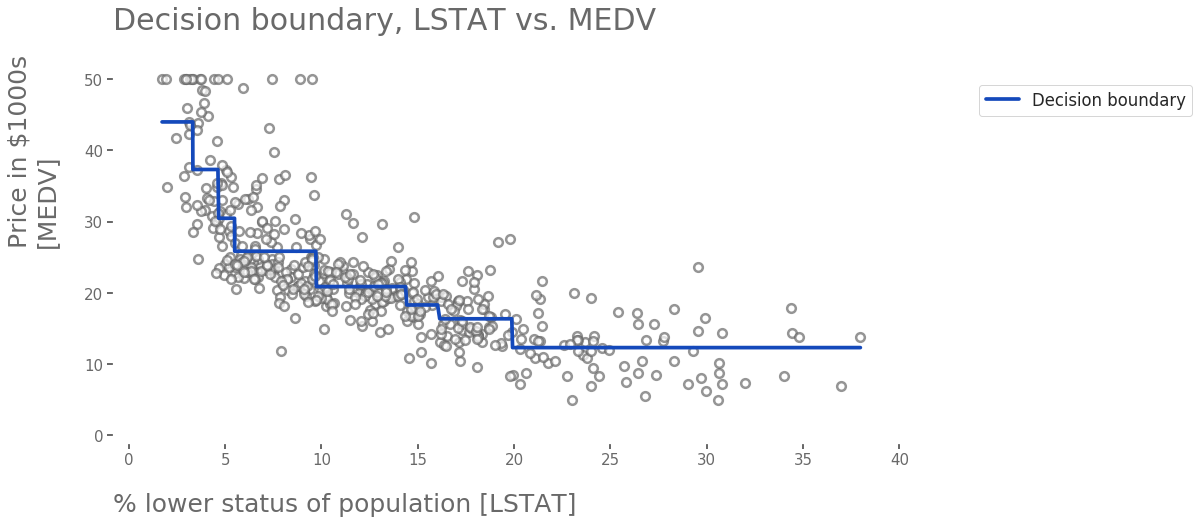

In [33]:
# set response and predictor variables
X = df[["LSTAT"]].values
y = df["MEDV"].values

dec = tree.DecisionTreeRegressor(max_depth=3)
dec.fit(X, y)

sortIx = X.flatten().argsort()

# plot decision boundary
p = PrettierPlot()
ax = p.makeCanvas(
    title="Decision boundary, LSTAT vs. MEDV",
    xLabel="% lower status of population [LSTAT]",
    yLabel="Price in $1000s \n[MEDV]",
    yShift=0.48,
)
p.pretty2dScatter(x=X, y=y, xUnits="f", yUnits="f", ax=ax)
p.prettyLine(
    x=X[sortIx],
    y=dec.predict(X[sortIx]),
    label="Decision boundary",
    linecolor=style.styleBlue,
    xUnits="f",
    yUnits="f",
    bbox=(1.3, 0.9),
    markerOn=False,
    ax=ax,
)

> Remarks - The decision tree captures the general trend. We need to be careful of overfitting the data, which in this case in controlled by the max_Depth parameter.

## Random forest regression

<a id = 'Random-forest-regression'></a>

In [34]:
# build RandomForestRegressor on full Boston Hosuing dataset
X = df.iloc[:, :-1].values
y = df["MEDV"].values

# fit tmodel
XTrain, XTest, yTrain, yTest = model_selection.train_test_split(
    X, y, test_size=0.4, random_state=1
)
forest = ensemble.RandomForestRegressor(
    n_estimators=1000, criterion="mse", random_state=1, n_jobs=-1
)
forest.fit(XTrain, yTrain)

# generate predictions and print MSE/R-squared
yPredTrain = forest.predict(XTrain)
yPredTest = forest.predict(XTest)

print("Train MSE: {}".format(metrics.mean_squared_error(yTrain, yPredTrain)))
print("Test MSE: {}".format(metrics.mean_squared_error(yTest, yPredTest)))

print("Train R^2: {}".format(metrics.r2_score(yTrain, yPredTrain)))
print("Test R^2: {}".format(metrics.r2_score(yTest, yPredTest)))

Train MSE: 1.6414409895378974
Test MSE: 11.055753098768493
Train R^2: 0.9794899516412922
Test R^2: 0.8775836858654068


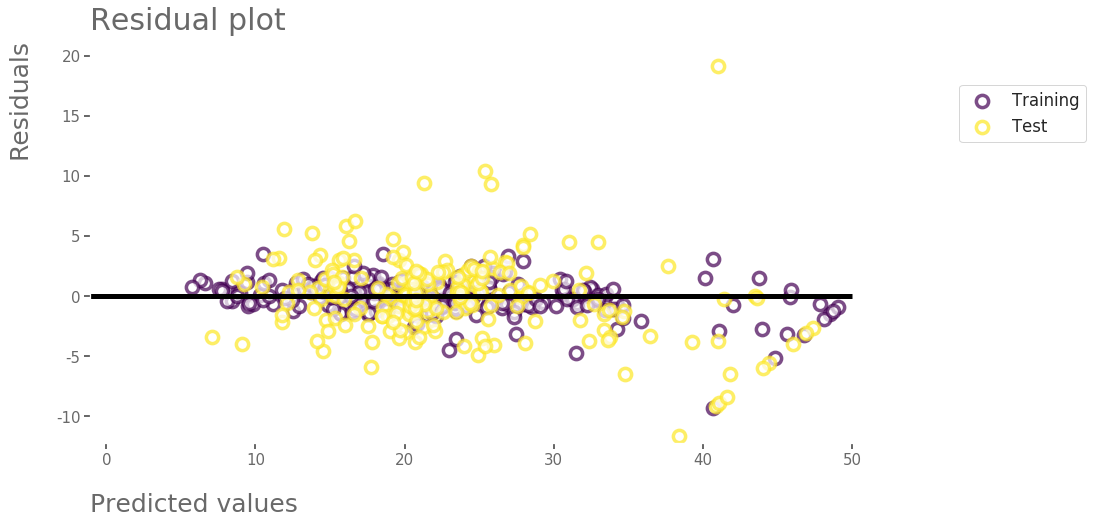

In [35]:
# residual plot
yActual = np.vstack((yTrain.reshape(-1, 1), yTest.reshape(-1, 1)))
yPreds = np.vstack((yPredTrain.reshape(-1, 1), yPredTest.reshape(-1, 1)))
yType = np.hstack((np.repeat(0, yTrain.shape[0]), np.repeat(1, yTest.shape[0])))

p = PrettierPlot()
ax = p.makeCanvas(
    title="Residual plot", xLabel="Predicted values", yLabel="Residuals", yShift=0.7
)
p.pretty2dScatterHue(
    x=yPreds,
    y=yPreds - yActual,
    target=yType,
    label=["Training", "Test"],
    xUnits="f",
    yUnits="f",
    bbox=(1.2, 0.9),
    ax=ax,
)
plt.hlines(y=0, xmin=-10, xmax=50, color="black", lw=5)

> Remarks - The model is overfitting the training data, which is evident in that fact that the MSE and $R^2$ is substantially higher for the training data compared to the test data. Also, by review the residual plot above, it's clear the green test set dots are further away from the black line. The residuals also do not seem to be completely randomly positioned around the black line, which suggest that the model is not capturing all explanatory information. The good news is that overall this residual plot shows improvements relative to the residual plot created for a different model earlier in the chapter. Further experimentation with hyperparameter tuning, removing outliers, transforming variables, etc. may improve the model. 